In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
plt.rcParams['font.family'] = 'Gulim'

# 그래프 x축 가져오기

In [12]:
df = pd.read_excel('./data_anal_proj/주간 아파트 매매가격지수_20241026.xlsx').T

In [20]:
seoul_columns = list ( df.values[0][:29] ) #추출할 서울 구 확인

In [21]:
df_seoul = df.drop(df.columns[29:], axis=1) # 서울 외 지역 칼럼에서 제외

In [22]:
df_seoul.columns = seoul_columns #칼럼 다시 세팅
df_seoul = df_seoul.iloc[1:]

In [23]:
df_seoul = df_seoul.drop( df_seoul.index[60] ) #예외 행 지우기

In [24]:
# df_seoul.index 를 통해 x축 가져오기

# 그래프 겹쳐그리기

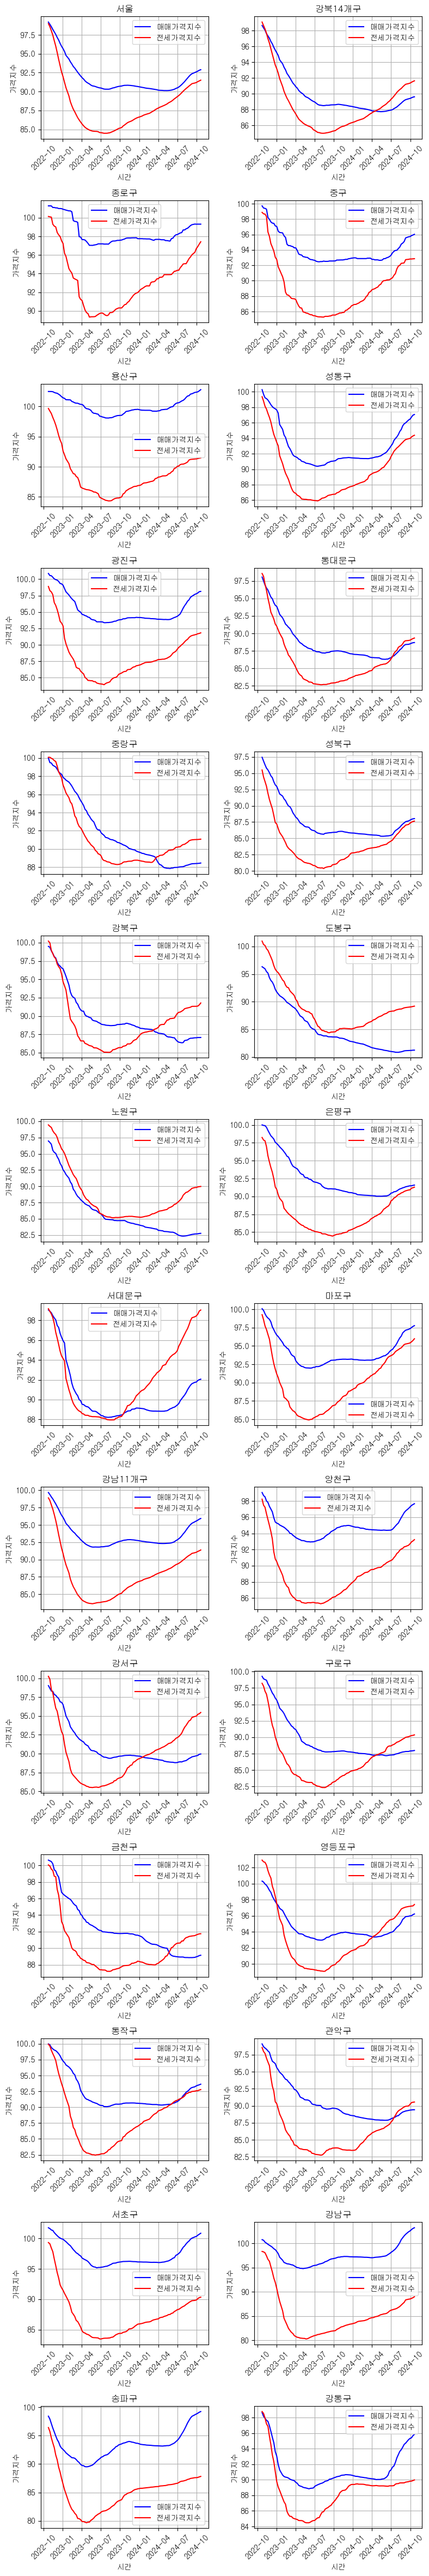

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 불러오기 (각각 매매가격지수와 전세가격지수 파일이라고 가정)
df_maemae = pd.read_csv('data_maemae.csv', index_col=0, parse_dates=True)
df_jeonse = pd.read_csv('data_jeonse.csv', index_col=0, parse_dates=True)

# 구 이름 리스트 (두 파일의 컬럼이 동일하다고 가정)
seoul_columns = df_maemae.columns

# 하나의 Figure 생성 및 설정
fig = plt.figure(figsize=(8, 50))
i = 1

# 각 구별로 Subplot을 생성하여 매매와 전세 데이터를 겹쳐 그리기
num_plots = len(seoul_columns)
rows = (num_plots // 2) + 1  # 2열로 나눌 경우 필요한 행 수 계산

for gu in seoul_columns:
    plt.subplot(rows, 2, i)
    
    # 매매가격지수 그래프
    plt.plot(df_seoul.index, df_maemae[gu], label='매매가격지수', color='b') # 위에서 가져온 df_seoul 활용
    
    # 전세가격지수 그래프
    plt.plot(df_seoul.index, df_jeonse[gu], label='전세가격지수', color='r')
    
    plt.title(gu)
    plt.xlabel('시간')  # x축 레이블을 시간으로 지정
    plt.ylabel('가격지수')  # y축 레이블을 가격지수로 지정
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.grid()  # 그리드 추가
    plt.legend()  # 범례 추가
    
    i += 1

# 레이아웃 조정 후 출력
plt.tight_layout()
plt.show()
